# AIN212 Project
by Alper Ozoner and Ali Utku Aydin

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white")

import warnings
warnings.filterwarnings("ignore")

# Warning! Please uncomment the line below if you get an error about the "yellowbrick" package:
**Note:** We uncommented it because it greatly increased the load time of this notebook everytime we ran it from scratch.

In [2]:
#conda install -c conda-forge yellowbrick

# Step 1: Data Collection
In this report we will build a classifier which predicts whether a given object is an exoplanet or not based on observations made by the Kepler telescope.

**Definition of an Exoplanet:** Exoplanets are planets that orbit around other stars. (NASA) These exoplanets may range in characteristics from earth-like objects, to gas giants similar to Jupiter or Saturn in our solar system.

The data used in this project can be accessed publicly from https://exoplanetarchive.ipac.caltech.edu/docs/PurposeOfKOITable.html. 

Our database is the "cumulative" version which encompasses the entire data from the Kepler Objects of Interest (KOI) Activity Tables which was last updated on Sept. 27, 2018 during the writing of this report.


In [3]:
url="https://drive.google.com/file/d/1Xi3_B0YeIh31ej7CYRGRC5ZkX2nnbf9y/view?usp=sharing"
url="http://drive.google.com/uc?id="+url.split('/')[-2]
df=pd.read_csv(url)

In [4]:
display(df)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Data Overview:

**Here are the descriptions of the variables from the database:**

**Note:** A "Kepler object" denotes an object observed by the Kepler telescope

**rowid** = ID of the row

**kepid** = Kepler object's ID

**kepoi_name** = Kepler object's name

**kepler_name** = The name the Kepler object gets if it is a "CONFIRMED" exoplanet. More explanation below. 

**koi_disposition** = The classification of a Kepler object. "FALSE POSITIVE" means object is not an exoplanet, "CONFIRMED" means object confirmed as exoplanet. "CANDIDATE" means that the object is in the process of determining whether it's an exoplanet or not. "CANDIDATE" Kepler objects will be dropped since they are neither confirmed exoplanets nor are declined an exoplanet status.

**koi_score** = A value between 0 and 1 that indicates the confidence in the Kepler object's disposition.

**koi_fpflag_nt** = A Kepler object whose light curve is not that of a transiting planet.

**koi_fpflag_ss** = A kepler object observed to have a significant secondary event, transit pattern, or non-ecliptic variability, indicating that the transit-like event is most likely due to an overlapping binary.

**koi_fpflag_co** = The source of the signal comes from a nearby star. If there's a source it's valued as 1.

**koi_fpflag_ec** = The Kepler object shares the same epoch and epoch as another object and is judged to be the result of flux contamination or electronic interference in the aperture.

**koi_period** = Kepler object's period. (days)

**koi_time0bk** = he time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC. 

**koi_impact** = The distance projected into the sky between the center of the star disk and the center of the conjunct planetary disk.Normalized by stellar radius.

**koi_duration** = The duration of the observed transits. (hours)

**koi_depth** = The fraction of stellar flux lost at the minimum of the planetary transit. (parts per million)

**koi_prad** = The radius of the kepler object. (Earth radii)

**koi_teq** = Approximation for the temperature of the kepler object. (Kelvin)

**koi_insol** = Insolation flux of the kepler object. (Earth flux)

**koi_model_snr** = Transit depth normalized by the mean uncertainty in the flux during the transits.

**koi_tce_plnt_num** = Planet number from TCE (Threshold Crossing Events).

**koi_steff** = The photospheric temperature of the star. (Kelvin)

**koi_slogg** = The base-10 logarithm of the acceleration due to gravity at the surface of the star. (log10(cm s^-2))

**koi_srad** = The photospheric radius of the star. (Solar radii)

**ra** = Right Ascension. (degree)

**dec** = Declination. (degree)

# Step 2: Data Preprocessing and Cleaning

In this step we clean and reorganize the data by techniques learned in class such as hot-encoding, and null data management, to make sure that a classifier model can be trained successfully on this data.

The "koi_disposition" column is the category of an object's exoplanet status from the observations from NASA's Exoplanet Archive. It will therefore be our target variable (y) in this model. Also, we remove the similarly named "koi_pdisposition" column from the data as it represents a transitionary comment point on the type of the planet being observed, therefore it is redundant and not needed for our purposes. So, we only include the "koi_disposition" column as it is the final remark concerning whether an object is an exoplanet or not.

In [5]:
# See possible values of the target variable
f = df.drop('koi_pdisposition', 1)
df.groupby('koi_disposition').size()

koi_disposition
CANDIDATE         2248
CONFIRMED         2293
FALSE POSITIVE    5023
dtype: int64

As seen above, it has three possible values, but we will remove the "candidate" rows as there is no consensus reached about whether those planets are exoplanets or not. We remove the candidate rows below:

In [6]:
# Remove the rows with "CANDIDATE" attribute
df = df.drop(df[df.koi_disposition == "CANDIDATE"].index)
print("Shape of the data after removing the candidate rows: ")
df.shape

Shape of the data after removing the candidate rows: 


(7316, 50)

We then use label encoding to convert "koi_disposition" variable into a category where **'CONFIRMED' = 1** and **'FALSE POSITIVE' = 0.**

In [7]:
# Convert the corresponding values to 0 and 1.
df['koi_disposition'] = df['koi_disposition'].astype('category')
df['koi_disposition'] = df['koi_disposition'].cat.codes
# Check the changes made
display(df['koi_disposition'].unique())
display(df['koi_disposition'])

array([0, 1], dtype=int8)

0       0
1       0
2       1
3       1
4       0
       ..
9556    1
9559    1
9560    1
9562    1
9563    1
Name: koi_disposition, Length: 7316, dtype: int8

Then, we check the data types of all columns and **remove columns "koi_tce_delivname", "rowid", "kepid", "kepoi_name", and "kepler_name"** which are only names and ID numbers for the objects (rows) which will not useful in the training of our classifier.

In [8]:
# Display the column types
df.dtypes

rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition         int8
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2

Additionally, we also decided **remove the error columns denoted by "err1" and "err2"** in their name as they will only decrease the quality of the model and since they only express the absolute uncertainty of the observations.

In [9]:
df = df[['koi_disposition','koi_score','koi_fpflag_nt','koi_fpflag_co','koi_fpflag_ec','koi_period','koi_time0bk','koi_impact','koi_duration','koi_depth','koi_prad','koi_teq','koi_insol','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_slogg','koi_srad','ra','dec','koi_kepmag']]
df.shape

(7316, 21)

We check the number of null values for each column and find that the fraction of null values are relatively small. Therefore, we can drop all rows with at least one null value and still remain with an acceptable number of rows.

In [10]:
# Display the number of rows with NULLs by each column
print(df.isna().sum())
df.shape

koi_disposition        0
koi_score           1059
koi_fpflag_nt          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_time0bk            0
koi_impact           300
koi_duration           0
koi_depth            300
koi_prad             300
koi_teq              300
koi_insol            259
koi_model_snr        300
koi_tce_plnt_num     279
koi_steff            300
koi_slogg            300
koi_srad             300
ra                     0
dec                    0
koi_kepmag             1
dtype: int64


(7316, 21)

In [11]:
# Drop the rows containing any number of NULLs
df = df.dropna(axis = 0, how = 'any')
df.shape

(6202, 21)

As predicted, we are left with about **six thousand** data points (rows) with **20** predictor variables which is an acceptable amount for our task.

# Step 3: Data Exploration and Analysis

In this step, we will explore, present some of the critical statistics about the data that has been collected and preprocessed. Later on, we will also carry on k-Means clustering to better understand the nature of the data.

In [12]:
# Separate the df dataFrame into its x and y components.
y = df[["koi_disposition"]]
x = df.loc[:, df.columns != 'koi_disposition']

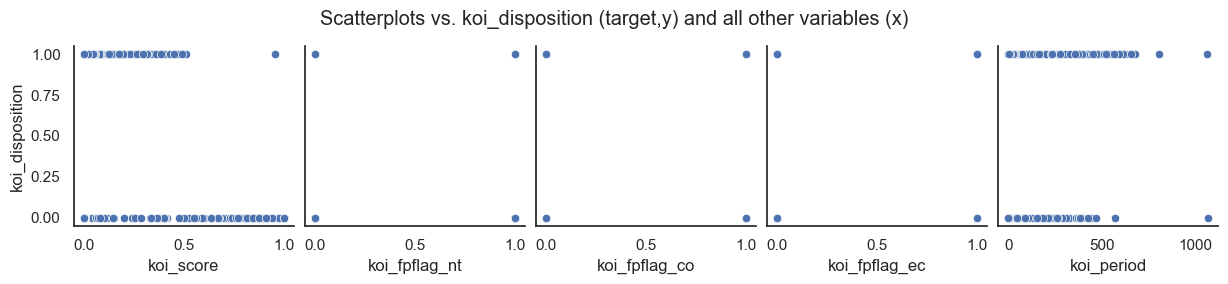

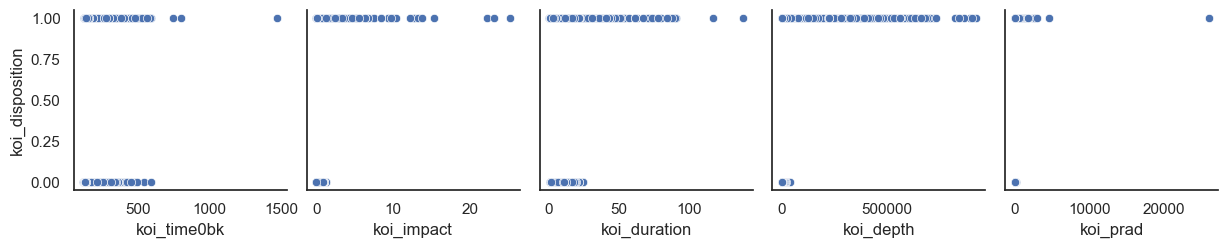

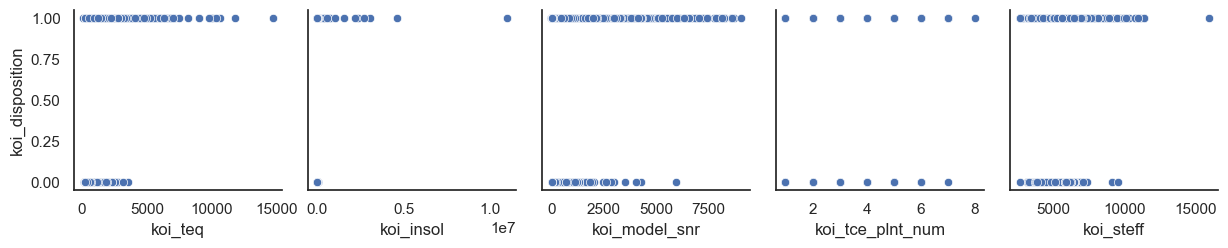

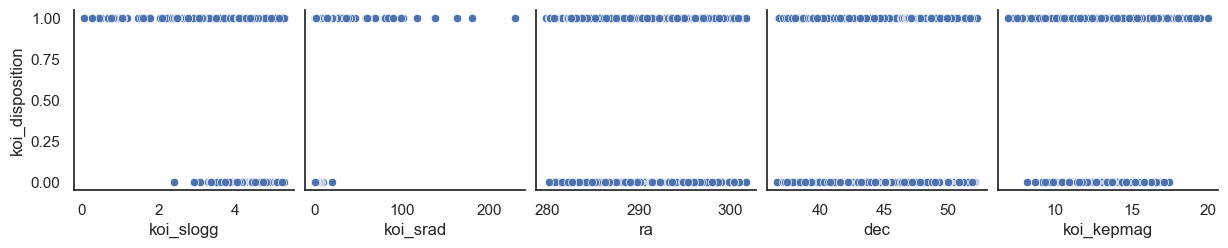

In [13]:
# Draw a scatter pairplot between x and y columns.
pp = sns.pairplot(data=df, y_vars=['koi_disposition'], x_vars=df.iloc[:, 1:6])
pp.fig.suptitle("Scatterplots vs. koi_disposition (target,y) and all other variables (x)", y = 1.1)
pp = sns.pairplot(data=df, y_vars=['koi_disposition'], x_vars=df.iloc[:, 6:11])
pp = sns.pairplot(data=df, y_vars=['koi_disposition'], x_vars=df.iloc[:, 11:16])
pp = sns.pairplot(data=df, y_vars=['koi_disposition'], x_vars=df.iloc[:, 16:21])

Above, we can see the pairplot between our target variable "koi_disposition" and all other predictor variables. Importantly, the usefulness of this plot varies greatly between different columns. For example, some of the pairplots only include four corner dots in them, such as in "koi_fpflag_nt". This is because we are comparing two categorical columns of values (0,1), therefore their plots do not offer much insight. We will analyze these better in our correlation heatmap in the upcoming parts.

Looking at more useful pairplots, we can see that some of the continous variables are distinctly grouped over their corresponding "koi_disposition" values, such as in "koi_teq", "koi_depth", "koi_duration", and "koi_srad". This is promising because it means that the data we have has distinct features in certain variables that will be easily classified as these variables seem to be taking part in determining whether a given object is an exoplanet or not.

Lastly, we have pairplots that are seemingly scattered all accross independtly of the target variable. The variables are "ra", "dec", "koi_kepmag", and the "koi_tce_plnt_num". These columns will be the biggest factor in decreasing the quality of our classifier model, and we will look at these in the upcoming parts.

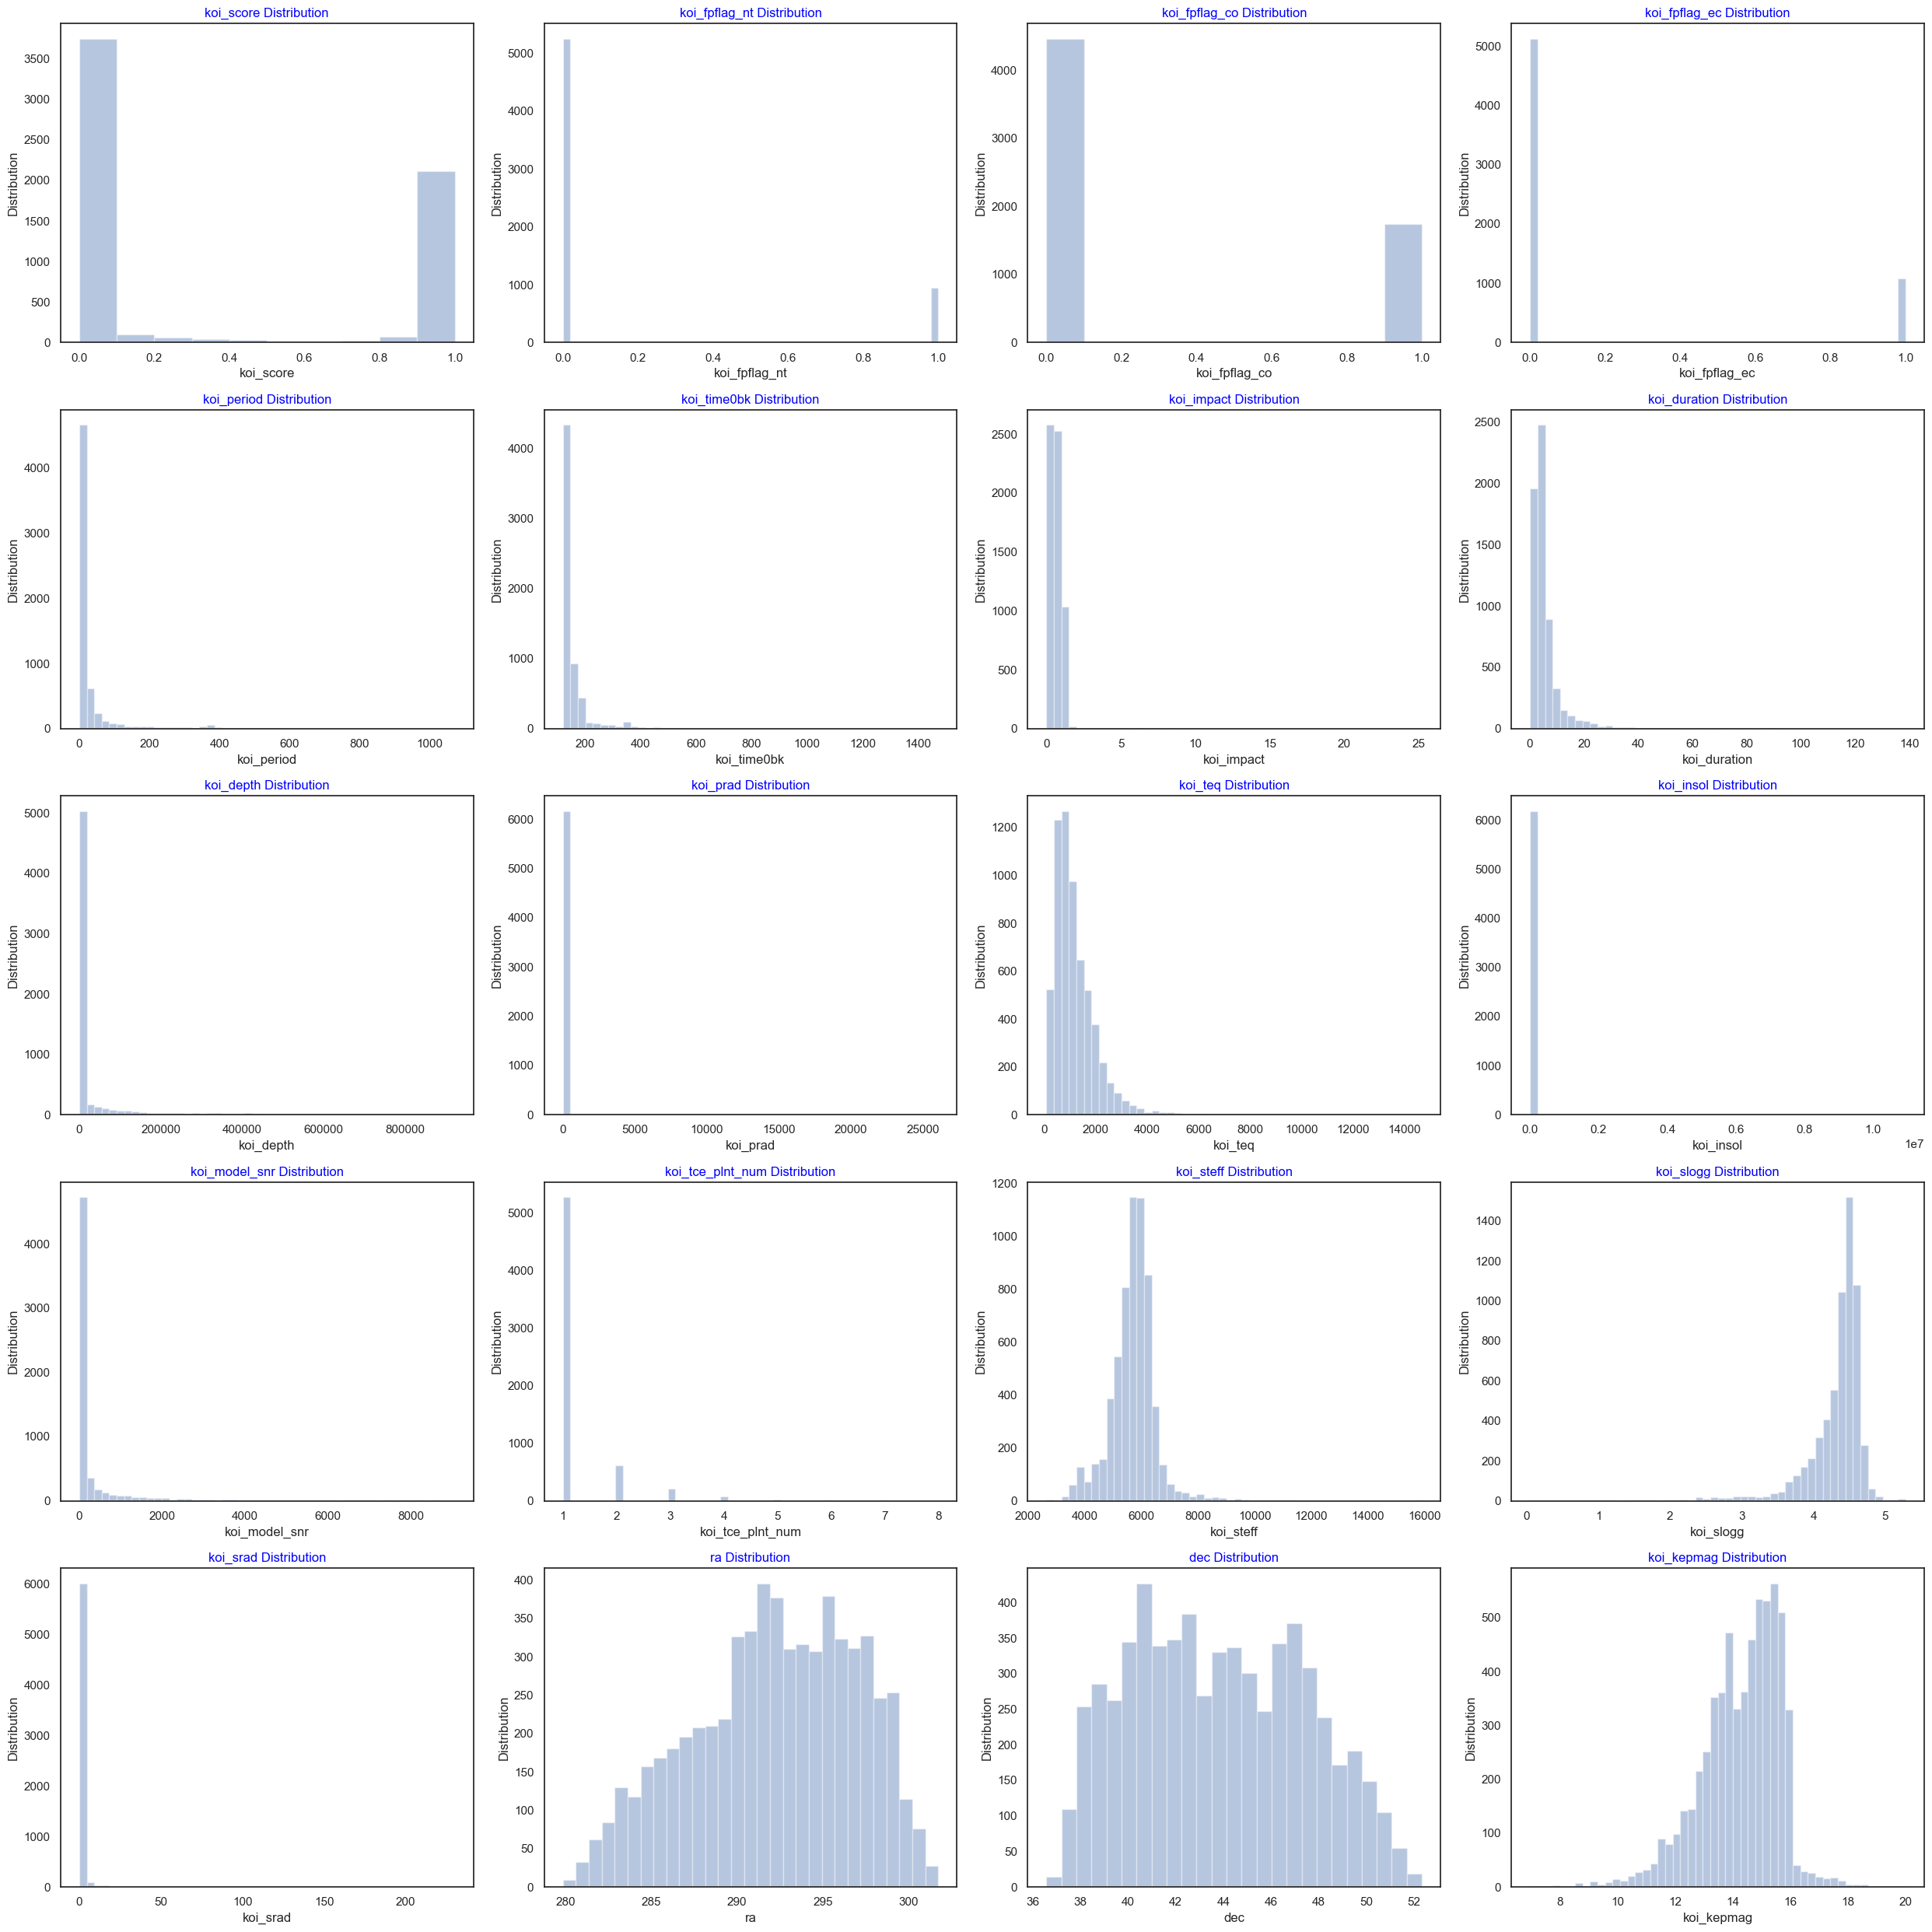

In [14]:
#Plot grid histogram of all predictor variables
f=plt.figure(figsize=(25,25))
for i, col in enumerate(x.columns):
    ax=f.add_subplot(5,4,i+1)
    sns.distplot(x[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

As seen in the above grid histogram, the most of contious histogram plots have outliers except for three ("ra", "dec", and "koi_kepmag"). This is problematic and we can deal with this by pruning the ourliers with the following script:

In [15]:
# Detect and exclude outliers
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# Separate the df dataFrame into its x and y components once again.
y = df[["koi_disposition"]]
x = df.loc[:, df.columns != 'koi_disposition']
df.shape

(5069, 21)

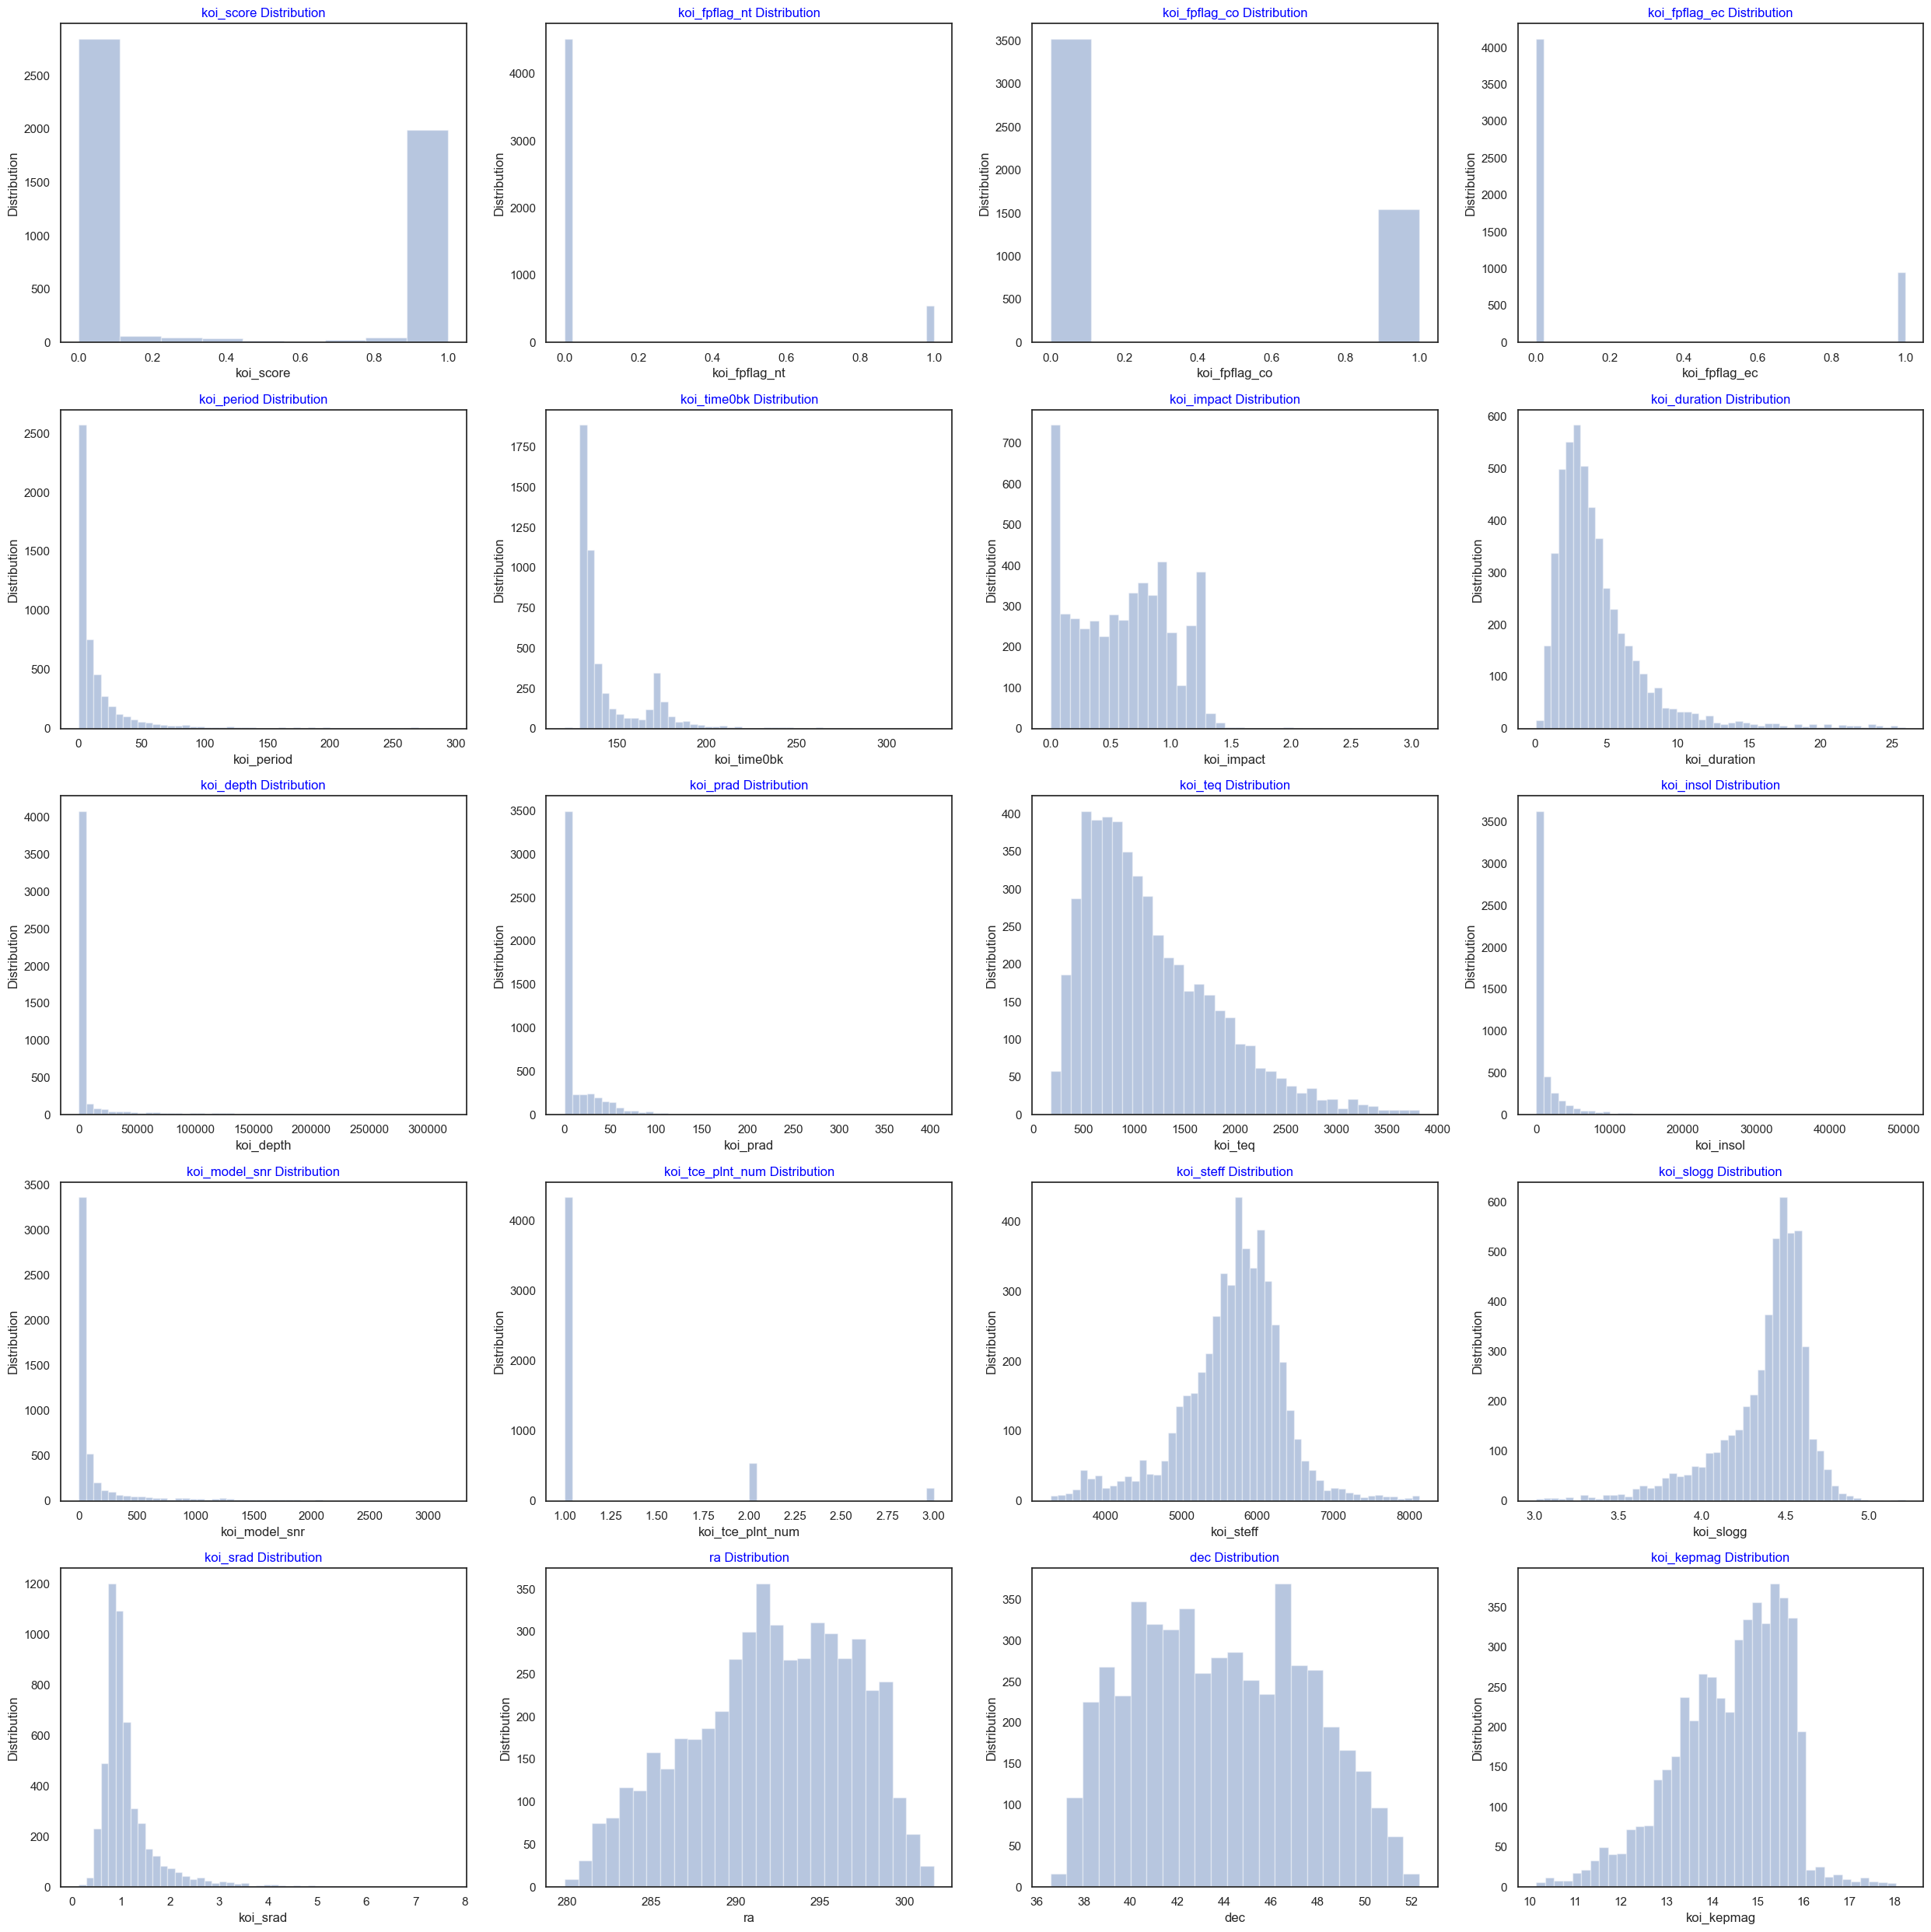

In [16]:
#Plot grid histogram of all predictor variables
f=plt.figure(figsize=(25,25))
for i, col in enumerate(x.columns):
    ax=f.add_subplot(5,4,i+1)
    sns.distplot(x[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

After the outlier detection and pruning, we are left with 4000 rows from 6000. This is number is more than enough based on our project specifications which is a minimum of 3000 rows.

<AxesSubplot:>

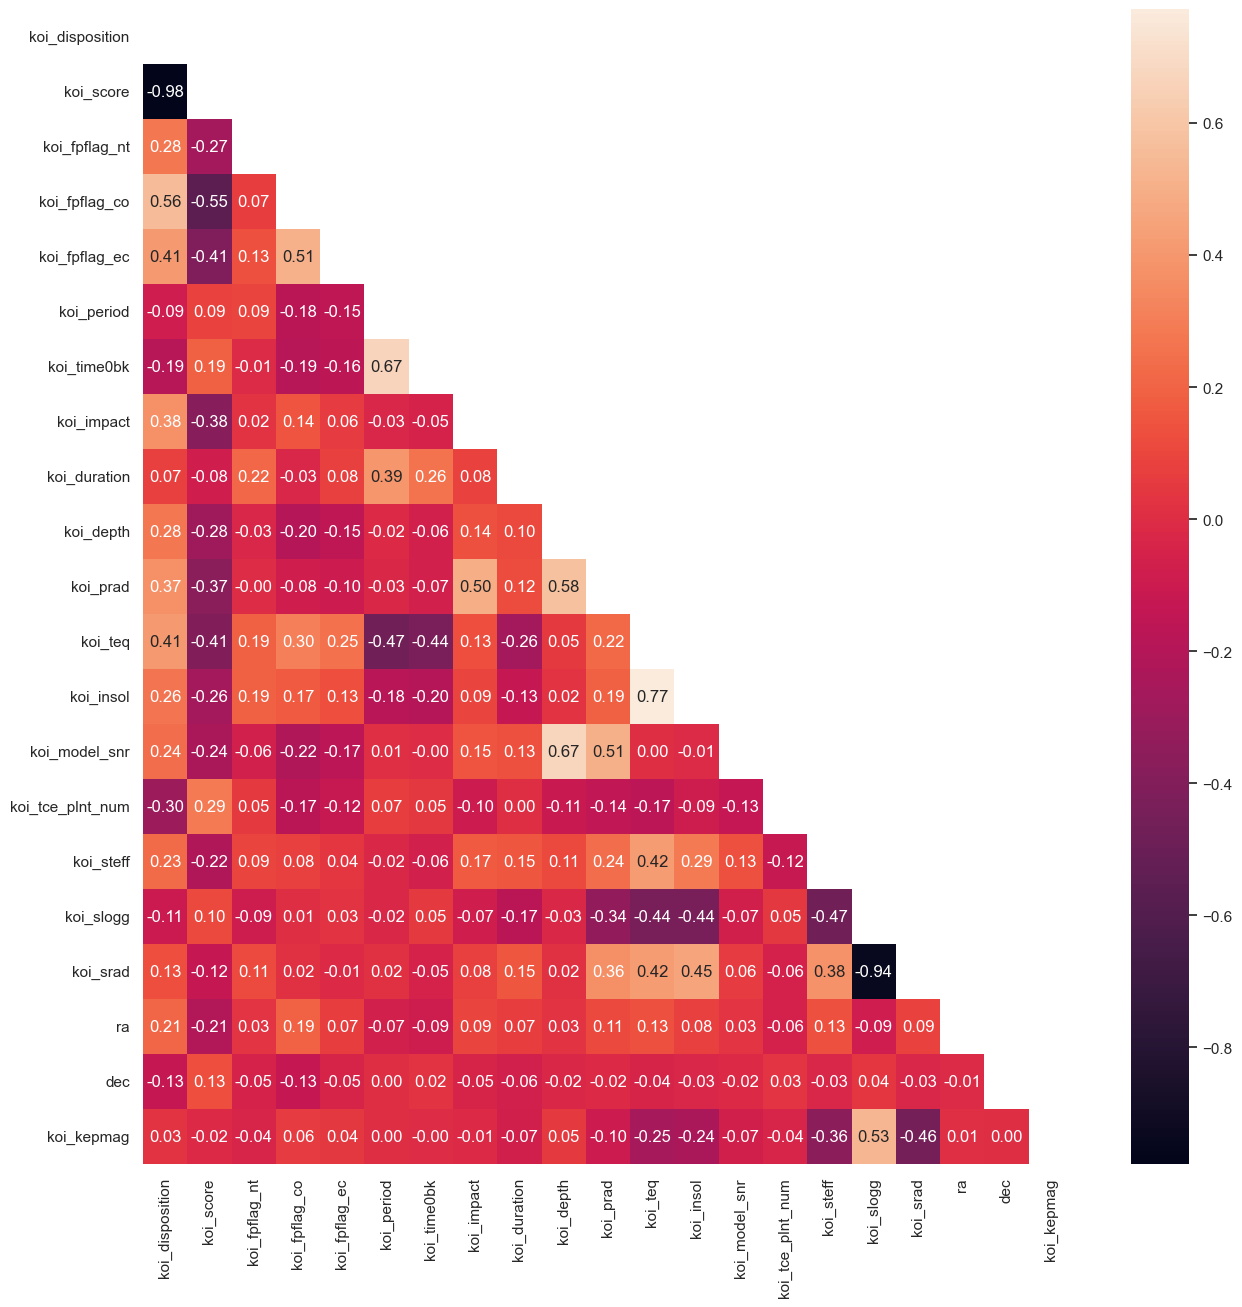

In [17]:
mask = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data = df.corr(), annot = True, fmt=".2f", ax = ax, mask = mask)

The above correlation heatmap shows us that some of the variables are neither positively nor negatively correlated with our target variable while four of five columns have correlations higher that 0.4 while there are three negatively correlated columns which are lower than a correlation of -0.25.

<AxesSubplot:>

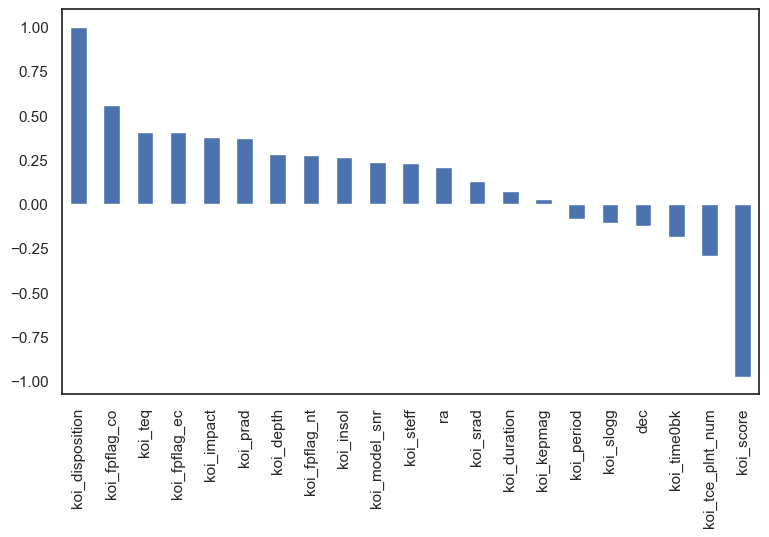

In [18]:
fig, ax = plt.subplots(figsize=(9,5))
df.corr()['koi_disposition'].sort_values(ascending=False).plot(kind = "bar", ax = ax)

Above, we can see that more than half of our variables are positively correlated with the highest being "koi_fpflag_co" and the lowest "koi_score".

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df)
df_scaled = pd.DataFrame(Scaled_df,columns=df.columns)
df_scaled.head()
#Normalization

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,-1.179423,1.226020,-0.349223,-0.662443,-0.480559,-0.263523,0.949380,-1.123423,-0.449289,-0.338831,...,-0.560108,-0.364858,-0.372554,-0.384323,-0.319646,0.336604,-0.347335,-0.037353,1.185829,0.779674
1,-1.179423,1.161419,-0.349223,-0.662443,-0.480559,0.902070,0.629319,-0.062579,-0.007984,-0.333495,...,-1.094885,-0.383491,-0.393187,1.740142,-0.319646,0.336604,-0.347335,-0.037353,1.185829,0.779674
2,0.847872,-0.857873,-0.349223,-0.662443,-0.480559,0.006564,1.161221,0.860837,-0.784020,-0.128438,...,-0.796938,-0.376832,-0.288992,-0.384323,0.267861,0.616766,-0.435793,1.025967,1.183744,0.852988
3,0.847872,-0.857873,-0.349223,-0.662443,-0.480559,-0.464603,0.940160,1.601017,-0.606242,-0.185084,...,0.359709,-0.188768,0.596765,-0.384323,0.197006,0.689535,-0.551238,-1.379374,1.225618,0.985614
4,-1.179423,1.226020,-0.349223,-0.662443,-0.480559,-0.444144,0.991529,0.214687,-0.820390,-0.339088,...,0.376517,-0.181225,-0.362032,-0.384323,0.530616,0.231089,-0.168920,-0.704073,1.209263,0.913123


In [21]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [22]:
# Find the highest scoring n_clusters and print it
scores = []
i = 2
for n_clusters in range(2,11):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(Scaled_df)
    centers = km.cluster_centers_
    score = silhouette_score(Scaled_df, preds, metric='euclidean')
    scores.append(score)

for score in scores:
    if score == max(scores):
        best_n_clusters = i;
    i += 1;
    
print ("For n_clusters = {}, silhouette score is {}".format(best_n_clusters, "{:.3f}".format(max(scores))))

For n_clusters = 5, silhouette score is 0.212


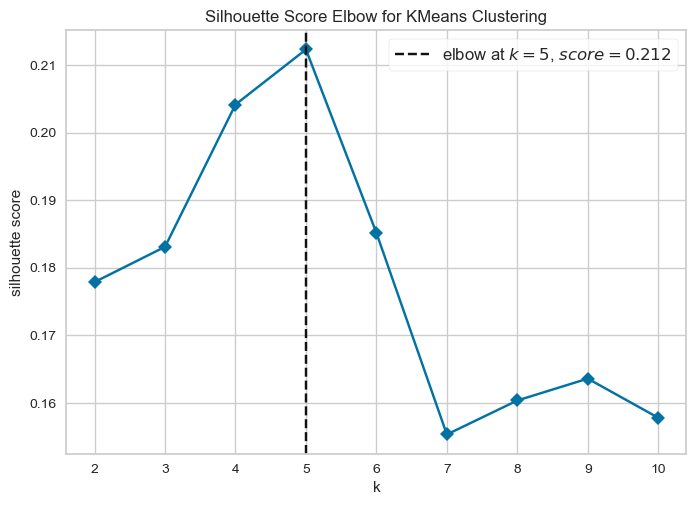

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans (n_clusters=best_n_clusters)
visualizer = KElbowVisualizer(
    km, k=(2,11),metric ='silhouette', timings=False
)

visualizer.fit(Scaled_df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

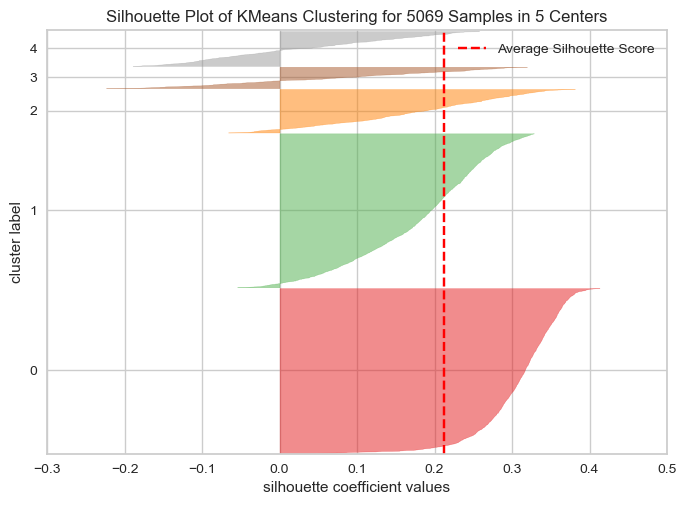

Average silhoutte score is: 0.212


In [24]:
from yellowbrick.cluster import SilhouetteVisualizer
km = KMeans (n_clusters = best_n_clusters)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(Scaled_df) # fit the training data to the visualizer
visualizer.poof() # Data show
print("Average silhoutte score is: " + "{:.3f}".format(max(scores)) )

In [25]:
print("From our clustering analysis, the best performing clustering solution has only " + str(best_n_clusters) + " clusters which is very promising since it suggests that the objects and variables associated with them roughly fall under " + str(best_n_clusters) +" categories which may as well be FALSE POSITIVES, CONFIRMEDs and the sub-classes of objects that fall in between, which are on the edges of what can be considered as an exoplanet, which is very intuitive nonetheless.")

From our clustering analysis, the best performing clustering solution has only 5 clusters which is very promising since it suggests that the objects and variables associated with them roughly fall under 5 categories which may as well be FALSE POSITIVES, CONFIRMEDs and the sub-classes of objects that fall in between, which are on the edges of what can be considered as an exoplanet, which is very intuitive nonetheless.


# Step 4: Predictive Modelling

We display our predictors (x) and response (y) variables before we go on with our model training:

In [26]:
print('X (Predictors):')
print('Shape:', end = ' ')
print(x.shape)
display(x.head(10))

print('Y (Response):')
display(y.head(10))

X (Predictors):
Shape: (5069, 20)


,koi_score,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1.000,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,0.969,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,0.000,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,0.000,0,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,1.000,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,1.000,0,0,0,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,1.0,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,1.000,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160.0,427.65,40.2,2.0,6046.0,4.486,0.972,296.28613,48.224670,15.714
7,0.992,0,0,0,2.566589,179.554370,0.755,2.42900,226.5,1.59,1360.0,807.74,15.0,3.0,6046.0,4.486,0.972,296.28613,48.224670,15.714
8,0.000,0,1,0,7.361790,132.250530,1.169,5.02200,233.7,39.21,1342.0,767.22,47.7,1.0,6227.0,3.986,1.958,298.86435,42.151569,12.660
9,1.000,0,0,0,16.068647,173.621937,0.052,3.53470,4914.3,5.76,600.0,30.75,161.9,1.0,5031.0,4.485,0.848,286.99948,48.375790,15.841


Y (Response):


,koi_disposition
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,0


# 4.1: kNN Regression Classifier

In [27]:
# Importing Train test split
from sklearn.model_selection import train_test_split

While training our model, we will use a test size of 20% which is considered generally as a good practice in the field of data science.

In [28]:
# train set of size 0.80
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x, y, train_size = 0.8, random_state = 1) 

# Check the length of newly formed split tables.
len(x_train_knn),len(x_test_knn)

(4055, 1014)

In [29]:
# importing KNN regressor
from sklearn.neighbors import KNeighborsClassifier as KNN_C
from sklearn.neighbors import kneighbors_graph

In [30]:
# importing accuracy score for error rate calculation in the validation step
from sklearn.metrics import accuracy_score

In [31]:
# Defining a cross-validation function for kNN by using accuracy as score metric.

def accuracy_rates_for_k (k1: int, k2: int, minkowski_p: int):
    accuracy_list = []
    for k in range(k1, k2):
        knn_model = KNN_C(n_neighbors = k, p = minkowski_p)
        knn_model.fit(x_train_knn, y_train_knn)
        y_predict_knn = knn_model.predict(x_test_knn)
        accuracy_i = accuracy_score(y_test_knn, y_predict_knn)
        accuracy_list.append(accuracy_i)

    return accuracy_list

In [32]:
# Calling the function twice to generate accuracy metrics for L1 and L2 methods respectively over the k-values between 1-40:

accuracy_list1 = accuracy_rates_for_k(1,40,1)
accuracy_list2 = accuracy_rates_for_k(1,40,2)


In [33]:
# Conversion to DataFrame format and extra touches:

accuracy_list1 = pd.DataFrame(data=accuracy_list1)
accuracy_list1.insert(0,'K',range(1,40), False)
accuracy_list1.rename(columns={ accuracy_list1.columns[1]: "Accuracy" }, inplace = True)

accuracy_list2 = pd.DataFrame(data=accuracy_list2)
accuracy_list2.insert(0,'K',range(1,40), False)
accuracy_list2.rename(columns={ accuracy_list2.columns[1]: "Accuracy" }, inplace = True)

# Cross-validation for kNN Classifier

Text(0, 0.5, 'Accuracy')

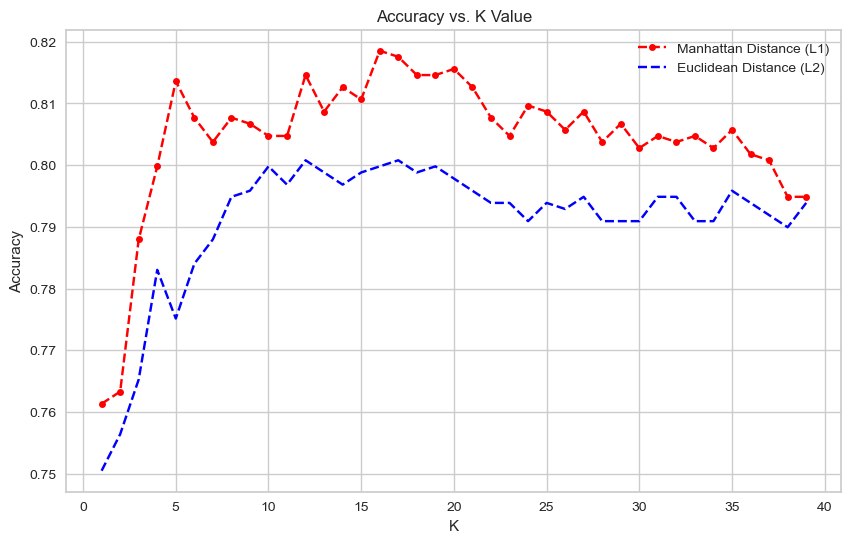

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_list1['Accuracy'],color='red', linestyle='dashed', marker='o', label='Manhattan Distance (L1)',
 markerfacecolor='red', markersize=5)
plt.plot(range(1,40),accuracy_list2['Accuracy'],color='blue', linestyle='dashed', marker='x', label='Euclidean Distance (L2)',
 markerfacecolor='blue', markersize=5)
plt.legend()
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

As seen in the above graph, the overall accuracy of the model using the L1 distance metric method (p=1) is superior to the 
model using L2 (p=2).

In [35]:
# Get the best performing k-value and its accuracy among the L1 method (p=1), red line:
accuracy_best = k_best = accuracy_list1.max()["Accuracy"]
k_best = accuracy_list1.idxmax()["Accuracy"] + 1

Choosing the best parameters for the kNN Classifier from the above graph:

In [36]:
print ("Among the kNN regressors, the best performing model in terms of accuracy is the one with Minkowski p-value of 1,")
print("and its k value is " + str(k_best) + " with an accuracy of " + "{:.2f}".format(accuracy_best) + ".\n")

Among the kNN regressors, the best performing model in terms of accuracy is the one with Minkowski p-value of 1,
and its k value is 16 with an accuracy of 0.82.



Assigning kNN outputs to variables for model comparison in the next parts:

In [37]:
# Fitting the kNN model with best parameters once again
knn_model = KNN_C(n_neighbors = k_best, p = 1)
knn_model.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=16, p=1)

In [38]:
# Testing the model accuracy
predictions_knn = knn_model.predict(x_test_knn)
accuracy_knn = accuracy_score(y_test_knn, predictions_knn)
# Print results
print("Overall accuracy of the k-NN Regression Classifier: " + "{:.2f}".format(accuracy_knn) + "\n")
print(classification_report(y_test_knn,predictions_knn))

Overall accuracy of the k-NN Regression Classifier: 0.82



NameError: name 'classification_report' is not defined

# 4.2: Logistic Regression Classifier

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

While training our model, we will use a test size of 20% which is considered generally as a good practice in the field of data science.

In [41]:
# Creating and training the Logistic Regression Classifier:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size=0.20,random_state=0)
# Check the length of newly formed split tables.
len(x_train_lr),len(x_test_lr)

(4055, 1014)

In [42]:
# Fitting the model
lr = LogisticRegression()
lr.fit(x_train_lr, y_train_lr)

# Testing the model accuracy
predictions_lr = lr.predict(x_test_lr)
accuracy_lr = accuracy_score(y_test_lr, predictions_lr)
# Print results
print("Overall accuracy of the Logistic Regression Classifier: " + "{:.2f}".format(accuracy_lr) + "\n")
print(classification_report(y_test_lr,predictions_lr))

Overall accuracy of the Logistic Regression Classifier: 0.81

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       404
           1       0.89      0.79      0.83       610

    accuracy                           0.81      1014
   macro avg       0.81      0.82      0.81      1014
weighted avg       0.82      0.81      0.81      1014



# Step 5: Model Evaluation and Visualizations

#  kNN vs. Logistic Classifier

As seen below, Logistic Regression Classifier has a cross-validated mean accuracy of **0.83** whereas the best performing kNN regressor has an accuracy value of **0.79**. This shows us that the **Logistic Classifier outperforms the kNN Classifier by around 5%.**

Also, the Logistic Classifier had all-around higher precision and recall comparted to kNN (0.75, 0.82) vs (0.76, 0.88). Which we will look closely in the next parts on a different graph.

In [43]:
# Print results for Logistic Classifier
print("Overall accuracy of the Logistic Regression Classifier: " + "{:.2f}".format(accuracy_lr) + "\n")
print(classification_report(y_test_lr,predictions_lr))

# Print results for k-NN Classifier
print("Overall accuracy of the k-NN Regression Classifier: " + "{:.2f}".format(accuracy_knn) + "\n")
print(classification_report(y_test_knn,predictions_knn))


Overall accuracy of the Logistic Regression Classifier: 0.81

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       404
           1       0.89      0.79      0.83       610

    accuracy                           0.81      1014
   macro avg       0.81      0.82      0.81      1014
weighted avg       0.82      0.81      0.81      1014

Overall accuracy of the k-NN Regression Classifier: 0.82

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       420
           1       0.87      0.81      0.84       594

    accuracy                           0.82      1014
   macro avg       0.81      0.82      0.82      1014
weighted avg       0.82      0.82      0.82      1014



Test dataset size: n = 1014


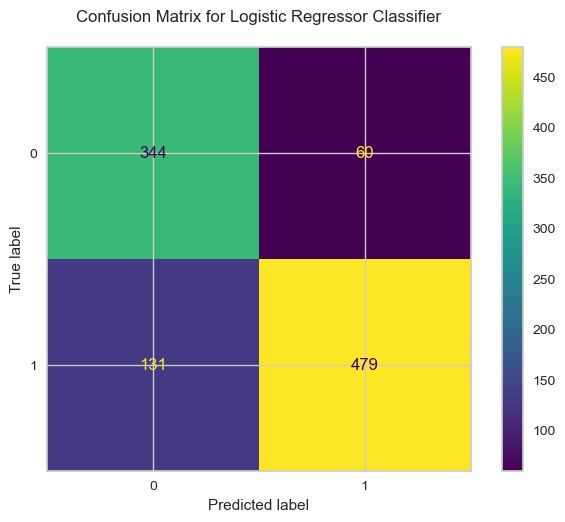

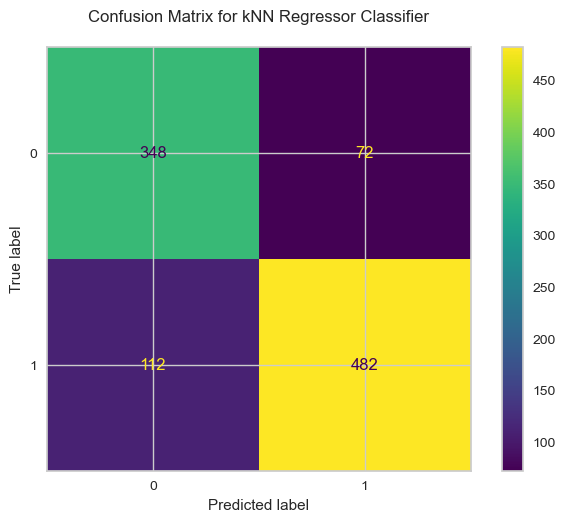

In [44]:
# Plot Confusion Matrices
from sklearn.metrics import plot_confusion_matrix

print("Test dataset size: n = " + str(len(x_test_lr)))
plot_confusion_matrix(lr, x_test_lr, y_test_lr)  
plt.title("Confusion Matrix for Logistic Regressor Classifier\n")
plt.show()

plot_confusion_matrix(knn_model, x_test_knn, y_test_knn)  
plt.title("Confusion Matrix for kNN Regressor Classifier\n")
plt.show()

The confusion matrix above support the findings in the previous part, and it can clearly be seen that the Logistic Classifier **has 4% higher fraction of True-Positive and True-Negative values** compared to the kNN Classifier.

We chose to create an ROC curve instead of a Precision-Recall curve as we have roughly the same number of observations between each class, meaning that we have similar number of 0s and 1s in our truth rows as seen in our confusion matrix above (which is about around 350 vs 450 from the above set of around n = 800).

In [ ]:
from sklearn import metrics
# lr plot
y_pred_prob_lr = lr.predict_proba(x_test_lr)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_lr,  y_pred_prob_lr)
auc_lr = metrics.roc_auc_score(y_test_lr, y_pred_prob_lr)
plt.plot(fpr,tpr,label="AUC for Logistic = "+ "{:.2f}".format(auc_lr), color = "blue")

#knn plot
y_pred_prob_knn = knn_model.predict_proba(x_test_knn)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_knn,  y_pred_prob_knn)
auc_knn = metrics.roc_auc_score(y_test_knn, y_pred_prob_knn)
plt.plot(fpr,tpr,label="AUC for k-NN = "+ "{:.2f}".format(auc_knn), color = "red")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Looking at the ROC curve above, we can see that the Logistic Classifier is the more succesfull model when compared to the kNN model. Both models are competent since they have an area under curve of 0.86 and 0.90 respectively which is vastly better than a random/constant classifier which will have an AUC of 0.5. At its peak, the Logistic Classifier is quite close to the perfrect skill point of (0,1) but it is still not on top of it. Which is a good sign, since it shows us that the model is not overfitted and performs skillfully accross different test data subsets.

# Conclusion

In this report, we have trained two classifier models, namely a kNN classifier and a logistic classifier on NASA's Kepler Objects of Interest (KOI) datasets. The logistic classifier outperformed the kNN classifier by around **5%** in most metrics and has an overall accuracy of **0.83**, and an AUC of **0.90**, which is to show that it is indeed a very successful model. We can now say that our logistic classifier can very skillfully determine whether an observed Kepler object is an exoplanet or not with great certainty, given 20 variables about that certain object of course.


We are proud to say that we have practiced the very steps of data science from data collection, preprocessing and cleaning, exploration and analysis to predictive modelling, and finally to model evaluation and numerous visualizations to better explain the whole process. We hope that you have enjoyed reading this report as much as we enjoyed while creating it.

**Closing Remarks and Possible Improvements**

We believe that we could have gone further by also clustering the data using agglomerative clustering technique we learnt in class, and comparing it with k-means, however we deemed that it would take a quite long time and space in the report. We also had wished to visualize the result of clustering of certain low-level variables such as "koi_teq", and "teq_prad", (the temperature and the radius of the given Kepler object) to better visualize and form a inuitive understanding about certain qualities that make an object qualify as an exoplanet. In this way, the reader could have a **better intuitive scientific understanding about the nature of planets and their distinctive qualities from other heavenly objects such as moon, comets, and asteroids.**

We should also note that certain variables used in this report are high-level data such as certain "flag" variables which are results of extensive scientific tests, rather than raw scientific data. This of course made our job easier, but we believe that it also made it **harder for an average reader to understand what that data really means** as most of their descriptions are something along the lines of: "The Kepler object shares the same epoch and epoch as another object and is judged to be the result of flux contamination or electronic interference in the aperture." This description is indeed very alien to an average reader. This could have been solved by including more low-level, raw scientific data by using another dataset. But honestly we haven't looked into that.

We hope that you agree with our remarks especially about the nature of scientific understanding we could have instilled the reader in this report but felt short in. We as the authors of this report, both love science and especially the observation of space itself, so we felt a little bit unfulfilled in this department. 

Thank you for your time.